# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests
import json


In [2]:
#tweet text dataframe
tweet_text = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
#image prediction dataframe
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Create Twitter api object
import tweepy

consumer_key = 
consumer_secret = '
access_token = '
access_secret = '
bearer_token = '

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


#client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)
api = tweepy.API(auth)


In [ ]:
#Query the api

#Get a list of all the tweet id's from the tweet_text df
tweet_ids = tweet_text['tweet_id'].tolist()



In [ ]:
#write quiered data to json file
data = []

for tweet_id in tweet_ids:
    try:
        tweet = client.get_tweet(tweet_id, tweet_mode='extended')
        data.append({
            'tweet_id': tweet.id,
            'retweet_count': tweet.retweet_count,
            'favorite_count': tweet.favorite_count
        })
    except tweepy.TweepError as e:
        print(f"Error processing tweet id {tweet_id}: {e}")

with open('tweet_json.txt', 'w') as outfile:
    for d in data:
        json.dump(d, outfile)
        outfile.write('\n')

In [5]:
#Load 3 data points from json to dictionary
with open('tweet-json.txt') as f:
    # Read the contents of the file as a string
    contents = f.read()

# Split the string into individual JSON objects
objects = contents.strip().split('\n')

#Create an empty df
df_api = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])

# Load each object into a Python dictionary
for obj in objects:
    data = json.loads(obj)
    tweet_id = data['id']
    retweet_count = data['retweet_count']
    favorite_count = data['favorite_count']
    df_api = df_api.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count}, ignore_index=True)



In [6]:
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
#Visiual Assessment
tweet_text

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
#Check for denominators less than 10
(tweet_text['rating_denominator'] < 10).sum()

3

In [9]:
#Compare those ratings to the text
tweet_text[tweet_text['rating_denominator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [10]:
#inspect full text
tweet_text.iloc[313]['text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [11]:
#inspect full text
tweet_text.iloc[2335]['text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [12]:
#inspect full text
tweet_text.iloc[516]['text']

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [13]:
#inspect data types 
tweet_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
#check for duplicates
tweet_text.duplicated().sum()

0

In [15]:
#Visual inspection
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
#inspect data types
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
#check for NaN
df_api.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Quality issues
1. The timestamp datatype is a string instead of datetime.

2. There are 181 retweets, and only tweets should be part of the data set.

3. Dog catergory columns have string values of "None" instead of NaN.

4. There are a mix of lower and upper case dog breeds in the image predictions table.

5. The pupper, doggo, floofer, and puppo dataype are strings and should be category.

6. The id columns are integers but should be strings.

7. Numerator and denominator are int data types and should be float.

8. There are 3 denominators <10 that do not match the text they were extraced from.

### Tidiness issues
1. There are three spearate datasets containing relevant data instead of one dataset.

2. The dog category variable (doggo, floofer, pupper, puppo) is one variable spread across 4 columns instead of being in one column.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [18]:
# Make copies of original pieces of data
tweet_text_clean = tweet_text.copy()
image_predictions_clean = image_predictions.copy()
df_api_clean = df_api.copy()

In [19]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue #1: Quality

#### Define:
1. Cast timestamp column to datetime datatype.
2. Change denominators to match the text. 
3. Cast pupper, doggo, and floofer to category data types.  
4. Change all dog breeds to lower case.
5. Turn rows with string "None" to NaN.
6. Drop retweets from table.
7. Cast numerators and denominators to float
8. Cast id columns to strings from ints.


#### Code 1

In [20]:
#timestamp column to datetime datatype
import datetime
tweet_text_clean['timestamp'] = tweet_text_clean['timestamp'].str[:-5]
tweet_text_clean['timestamp'] = pd.to_datetime(tweet_text_clean['timestamp'])


#### Test

In [21]:
tweet_text_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### Code 2

In [22]:
#Change denominators to match the text.
tweet_text_clean.loc[2335,'rating_denominator'] = 10
tweet_text_clean.loc[2335, 'rating_numerator'] = 9

#### Test

In [23]:
tweet_text_clean.iloc[2335]

tweet_id                                                     666287406224695296
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2015-11-16 16:11:11
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is an Albanian 3 1/2 legged  Episcopalian...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/666287406...
rating_numerator                                                              9
rating_denominator                                                           10
name                                    

#### Code 3

In [24]:
#change data types of doggo, floofer, pupper, and puppo to category
tweet_text_clean = tweet_text_clean.astype({'doggo':'category', 'floofer':'category', 'pupper':'category', 'puppo':'category'})


#### Test

In [25]:
tweet_text_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                               category
floofer                             category
pupper                              category
puppo                               category
dtype: object

#### Code 4

In [26]:
#change dog breeds to lowercase
image_predictions[['p1', 'p2', 'p3']] = image_predictions[['p1', 'p2', 'p3']].apply(lambda x: x.str.lower())


#### Test

In [27]:
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True


#### Code 5

In [28]:
#Turn rows with string "None" to NaN
tweet_text_clean[['doggo', 'pupper', 'puppo', 'floofer']] = tweet_text_clean[['doggo', 'pupper', 'puppo', 'floofer']].applymap(lambda x: np.nan if x == 'None' else x)



#### Test

In [29]:
tweet_text_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](1), floa

#### Code 6

In [30]:
#Drop retweets and replies

#create list of tweet ids that are retweets and replies

retweets = (tweet_text_clean.loc[tweet_text_clean['retweeted_status_id'].notnull(), 'tweet_id']).tolist()


replies = tweet_text_clean.loc[tweet_text_clean['in_reply_to_status_id'].notnull(), 'tweet_id'].tolist()

combined_responses = retweets + replies


len(retweets), len(replies), len(combined_responses)



(181, 78, 259)

In [31]:
#drop retweets and replies from first dataframe
tweet_text_clean = tweet_text_clean.drop(tweet_text_clean[tweet_text_clean['retweeted_status_id'].notnull()].index)
tweet_text_clean = tweet_text_clean.drop(tweet_text_clean[tweet_text_clean['in_reply_to_status_id'].notnull()].index)

#### Test

In [32]:
tweet_text_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns](1), float64(4), 

In [33]:
#drop retweet columns, now that retweet rows have been dropped
tweet_text_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#test
tweet_text_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


In [34]:
#drop retweets from api dataframe
mask = df_api_clean['tweet_id'].isin(combined_responses)
df_api_clean = df_api_clean.loc[~mask]


#test
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2097 non-null object
retweet_count     2097 non-null object
favorite_count    2097 non-null object
dtypes: object(3)
memory usage: 65.5+ KB


In [35]:
#drop retweets from image predictons data frame
mask = image_predictions_clean['tweet_id'].isin(combined_responses)
image_predictions_clean = image_predictions_clean.loc[~mask]

#test
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1971 non-null int64
jpg_url     1971 non-null object
img_num     1971 non-null int64
p1          1971 non-null object
p1_conf     1971 non-null float64
p1_dog      1971 non-null bool
p2          1971 non-null object
p2_conf     1971 non-null float64
p2_dog      1971 non-null bool
p3          1971 non-null object
p3_conf     1971 non-null float64
p3_dog      1971 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


#### Code 7

In [36]:
#Cast numerators and denominators to float
tweet_text_clean = tweet_text_clean.astype({'rating_numerator':'float', 'rating_denominator':'float',})


#### Test

In [37]:
tweet_text_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 213.0+ KB


#### Code 8

In [38]:
#Cast id columns to strings from ints.
tweet_text_clean = tweet_text_clean.astype({'tweet_id':'str'})
df_api_clean = df_api_clean.astype({'tweet_id':'str'})
image_predictions_clean = image_predictions_clean.astype({'tweet_id':'str'})


#### Test

In [39]:
tweet_text_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 213.0+ KB


### Issue #2: Tidiness

#### Define
1. Melt dog stage columns (doggo, fluffer, pupper, puppo).
2. Merge the three datasets

#### Code 1

In [40]:
#Melt dog stage columns (doggo, fluffer, pupper, puppo).

#Replace NaN with empty string
tweet_text_clean[['doggo', 'pupper', 'puppo', 'floofer']] = tweet_text_clean[['doggo', 'pupper', 'puppo', 'floofer']].fillna('')

#merge stages from the 4 stage columns into the new stages column
tweet_text_clean['stages'] = tweet_text_clean['doggo'] + tweet_text_clean['floofer'] + tweet_text_clean['pupper'] + tweet_text_clean['puppo']

#turn empty stage rows back into NaN
tweet_text_clean[['stages']] = tweet_text_clean[['stages']].applymap(lambda x: np.nan if x == '' else x)

#drop old columns
tweet_text_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#fix unreadable values
tweet_text_clean.loc[tweet_text_clean.stages == 'doggopuppo', 'stages'] = 'doggo, puppo'
tweet_text_clean.loc[tweet_text_clean.stages == 'doggofloofer', 'stages'] = 'doggo, floofer'
tweet_text_clean.loc[tweet_text_clean.stages == 'doggopupper', 'stages'] = 'doggo, pupper'


# Melt dog stage columns
import re

#Create empty stage column
tweet_text_clean['stage'] = np.nan

#function to parse and extract dog stage from text column
def stage(text):
    if not isinstance(text, str):
        text = str(text)
    catgr = re.findall('doggo|floofer|pupper|puppo', text, flags=re.IGNORECASE)
    catgr = [*set(catgr)]
    if len(catgr) == 0:
        return np.nan
    catgr = ', '.join(catgr)
    return catgr

#populate stage column with extracted stages
tweet_text_clean['stage'] = tweet_text_clean['text'].apply(stage)
    

#### Test

In [41]:
tweet_text_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
stages                336 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 163.8+ KB


In [41]:
tweet_text_clean['stages'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

#### Code 2

In [42]:
#Merge datasets

#create main dataset
df = tweet_text_clean

In [43]:
#merge api df with main df

df = pd.merge(df, df_api_clean[['tweet_id', 'retweet_count', 'favorite_count']], left_on='tweet_id', right_on='tweet_id')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
stages                336 non-null object
retweet_count         2097 non-null object
favorite_count        2097 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 196.6+ KB


In [44]:
#merge image predictions

#create new column with the best confidence value AND dog == True
def best(row):
    if row.p1_dog == False:
        if row.p2_dog == False:
            if row.p3_dog == False:
                return np.nan
            else:
                return row.p3
        else:
            return row.p2
    else:
        return row.p1


image_predictions_clean['best_prediction'] = image_predictions_clean.apply(best, axis=1)  
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher


In [45]:
#merge the best predictions with main df

df = pd.merge(df, image_predictions_clean[['tweet_id', 'best_prediction']], left_on='tweet_id', right_on='tweet_id')




#### Test

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1971 non-null object
stages                303 non-null object
retweet_count         1971 non-null object
favorite_count        1971 non-null object
best_prediction       1666 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 200.2+ KB


#### Code (one last quality issue)

In [47]:
#Remove inncorrect names

#Check to see if all names beginning with a lower case is not a real name
lowers = df.loc[df['name'].str.islower()].name
lowers.unique()


array(['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not',
       'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all',
       'infuriating', 'the', 'actually', 'by', 'officially', 'light',
       'space'], dtype=object)

In [48]:
#Replace inncorrect names with NaN
df[['name']] = df[['name']].applymap(lambda x: np.nan if x.islower() else x)


#### Test

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1873 non-null object
stages                303 non-null object
retweet_count         1971 non-null object
favorite_count        1971 non-null object
best_prediction       1666 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 200.2+ KB


#### Code 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1873 non-null object
stages                303 non-null object
retweet_count         1971 non-null object
favorite_count        1971 non-null object
best_prediction       1666 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 200.2+ KB


In [51]:
#Add column representing the rating ratio as a float

df['rating'] = df['rating_numerator'] / df['rating_denominator']

In [52]:
df.rating.unique()

array([  1.30000000e+00,   1.20000000e+00,   1.40000000e+00,
         5.00000000e-01,   1.10000000e+00,   6.00000000e-01,
         1.00000000e+00,   0.00000000e+00,   3.42857143e+00,
         7.50000000e+00,   2.70000000e+00,   3.00000000e-01,
         7.00000000e-01,   8.00000000e-01,   9.00000000e-01,
         4.00000000e-01,   1.77600000e+02,   8.18181818e-01,
         2.00000000e-01,   6.36363636e-01,   2.60000000e+00,
         1.00000000e-01,   4.20000000e+01])

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [53]:
df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [54]:
df['best_prediction'].value_counts()

golden_retriever                  156
labrador_retriever                106
pembroke                           94
chihuahua                          90
pug                                62
toy_poodle                         50
chow                               48
samoyed                            42
pomeranian                         41
malamute                           33
chesapeake_bay_retriever           31
french_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 24
eskimo_dog                         22
cardigan                           21
german_shepherd                    21
siberian_husky                     20
shih-tzu                           20
staffordshire_bullterrier          20
beagle                             20
maltese_dog                        19
shetland_sheepdog                  18
rottweiler                         18
kuvasz                             17
basset                             17
italian_grey

In [55]:
#rating averages by breed

labrador_avg = df.query('best_prediction == "labrador_retriever"')['rating'].mean()
pembroke_avg = df.query('best_prediction == "pembroke"')['rating'].mean()
chihuahua_avg = df.query('best_prediction == "chihuahua"')['rating'].mean()

"labrador average rating:", labrador_avg, "pembroke average rating:", pembroke_avg, "chihuahua average rating:", chihuahua_avg



('labrador average rating:',
 1.1198113207547167,
 'pembroke average rating:',
 1.1425531914893614,
 'chihuahua average rating:',
 1.0492929292929294)

In [56]:
#retweets by breed
labrador_retweets = df.query('best_prediction == "labrador_retriever"')['retweet_count'].sum()
pembroke_retweets = df.query('best_prediction == "pembroke"')['retweet_count'].sum()
chihuahua_retweets = df.query('best_prediction == "chihuahua"')['retweet_count'].sum()

"labs:", labrador_retweets, "pembrokes:", pembroke_retweets, "chihuahas:", chihuahua_retweets


('labs:', 405404, 'pembrokes:', 291771, 'chihuahas:', 250722)

In [57]:
#stats by dog stages
puppers = df.query('stages == "pupper"')['rating'].describe()
puppers


count    201.000000
mean       1.071642
std        0.208427
min        0.300000
25%        1.000000
50%        1.100000
75%        1.200000
max        2.700000
Name: rating, dtype: float64

In [58]:
#stats by dog stages
doggos = df.query('stages == "doggo"')['rating'].describe()
doggos

count    63.000000
mean      1.188889
std       0.147135
min       0.800000
25%       1.100000
50%       1.200000
75%       1.300000
max       1.400000
Name: rating, dtype: float64

In [59]:
#stats by dog stages
puppos = df.query('stages == "puppo"')['rating'].describe()
puppos

count    22.000000
mean      1.200000
std       0.130931
min       0.900000
25%       1.125000
50%       1.200000
75%       1.300000
max       1.400000
Name: rating, dtype: float64

In [60]:
#breakdown of stages for golden retrievers
goldens = df.query('best_prediction == "golden_retriever"')['stages'].value_counts()
goldens

pupper         16
doggo          10
doggopupper     4
puppo           3
floofer         1
Name: stages, dtype: int64

### Insights:
1. In an investigation of three dog breeds; labradors, pembrokes, and chihuahuas had similar rating averages with 1.1198113207547167, 1.1425531914893614, 1.0492929292929294 respectively.

2. Investigating the popularity if the same three dog breeds by measure of retweets puts labradors in a clear first place with 405,404, 291,771, and 250,722 respectively.

3. Investigating the top three occurences of dog stages; pupper, doggo and puppo by measure of average ratings yielded 1.07, 1.88, and 1.2 respectively. Puppos having the best average as well as the lowest standard deviation implying that most dogs in that category are closer to the average.

### Visualization

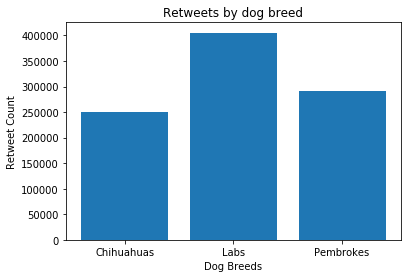

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

sums = [labrador_retweets, pembroke_retweets, chihuahua_retweets]
labels = ["Labs", "Pembrokes", "Chihuahuas"]

plt.bar(labels, sums)
plt.xlabel('Dog Breeds')
plt.ylabel("Retweet Count")
plt.title("Retweets by dog breed")
plt.savefig('retweets_vis.png', dpi=300, bbox_inches='tight')
plt.show()